(array([ 0.01152747,  0.03354827,  0.04671817,  0.05368331,  0.06049638,
         0.06353793,  0.06095261,  0.06253422,  0.0566032 ,  0.05505201,
         0.0505201 ,  0.04845185,  0.0438287 ,  0.04017884,  0.0371373 ,
         0.03312245,  0.03017215,  0.02545775,  0.02354158,  0.02116917,
         0.01861427,  0.01694142,  0.01423444,  0.01256159,  0.01079749,
         0.00976337,  0.00927672,  0.00757345,  0.00596143,  0.00587019,
         0.00559645,  0.00441024,  0.00416692,  0.00358903,  0.00331529,
         0.00298072,  0.00264615,  0.00212908,  0.00133828]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 39 Patch objects>)

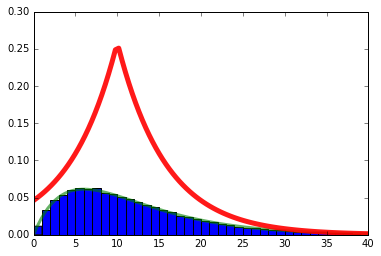

In [1]:
%matplotlib inline

import numpy as np
import math
from numpy.linalg import inv
import matplotlib
from scipy.stats import binom
from scipy.stats import gamma
from scipy.stats import laplace
from scipy import integrate
from matplotlib import pyplot as plt


a = 2
c = 3

gamma_d = lambda x: (1/6)**a * x**(a-1) * np.exp(-(1/6)*x) / math.gamma(a)
laplace_d = lambda x: x
#print(gamma_d(1))

x = np.linspace(0.1,40, 100)
plt.plot(x, gamma_d(x),'g-', lw=3, alpha=0.6, label='gamma pdf')

loc = 10
scale = 5.8

x = np.linspace(0.1, 40, 100)
plt.plot(x, c*laplace.pdf(x,loc,scale),'r-', lw=5, alpha=0.9, label='laplace pdf')

def rejection_sampling(p,c):
    loc, scale = 10., 5.8
    X = []
    s = np.random.laplace(loc, scale, 100000)
    for i in s:
        q_eval = c*laplace.pdf(i,loc,scale)
        p_eval = p(i)
        s2 = np.random.uniform(0,q_eval)
        if s2 <= p_eval:
            X.append(i)
    return X

plt.hist(rejection_sampling(gamma_d,c),bins=np.arange(40),normed=True)
